In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

%matplotlib inline

#matplotlib 패키지 한글 깨짐 처리 시작
#한글 폰트(맑은 고딕) 적용 : 윈도우, 구글 콜랩
matplotlib.rc('font', family = "Malgun Gothic")
plt.rc('font', family = "Malgun Gothic")

#seaborn에서 한글 깨짐 해결
#minus 깨짐현상 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df_inter = pd.read_csv('./inventory_interest_final.csv', engine='python')
df_inter.head(10)

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest
0,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,188,...,Trombone Shorty,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0
1,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,1231,...,Matt Damon,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0
2,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,376,...,O'Shea Jackson Jr.,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0
3,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,1101,...,Daniel Craig,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0
4,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,148,...,Adam Sandler,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0
5,I-1093,tt2380307,Coco,2017,2018,105,PG,8.4,305662,930,...,Anthony Gonzalez,Gael Garc占쏙옙a Bernal,Benjamin Bratt,2700,10,10,7200.0,12657600.0,11142.0,8442.0
6,I-1048,tt2395427,Avengers: Age of Ultron,2015,2016,141,PG-13,7.3,688963,1242,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,2295,10,1,5500.0,11137500.0,9804.0,7509.0
7,I-1044,tt2310332,The Hobbit: The Battle of the Five Armies,2014,2015,144,PG-13,7.4,447259,869,...,Ian McKellen,Martin Freeman,Richard Armitage,2195,6,1,4500.0,9729000.0,8564.0,6369.0
8,I-1054,tt2096673,Inside Out,2015,2016,95,PG,8.2,556161,972,...,Amy Poehler,Phyllis Smith,Richard Kind,2700,10,10,7200.0,9957600.0,8765.0,6065.0
9,I-1052,tt3079380,Spy,2015,2016,119,R,7.0,217805,479,...,Jude Law,Raad Rawi,Melissa McCarthy,2195,6,1,4500.0,8950500.0,7879.0,5684.0


In [3]:
df_inter_top10 = df_inter.head(10)
display(df_inter_top10)
df_inter_top10.info()

df_inter_low10 = df_inter.tail(10)
display(df_inter_low10)
df_inter_low10.info()

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest
0,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,188,...,Trombone Shorty,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0
1,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,1231,...,Matt Damon,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0
2,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,376,...,O'Shea Jackson Jr.,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0
3,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,1101,...,Daniel Craig,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0
4,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,148,...,Adam Sandler,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0
5,I-1093,tt2380307,Coco,2017,2018,105,PG,8.4,305662,930,...,Anthony Gonzalez,Gael Garc占쏙옙a Bernal,Benjamin Bratt,2700,10,10,7200.0,12657600.0,11142.0,8442.0
6,I-1048,tt2395427,Avengers: Age of Ultron,2015,2016,141,PG-13,7.3,688963,1242,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,2295,10,1,5500.0,11137500.0,9804.0,7509.0
7,I-1044,tt2310332,The Hobbit: The Battle of the Five Armies,2014,2015,144,PG-13,7.4,447259,869,...,Ian McKellen,Martin Freeman,Richard Armitage,2195,6,1,4500.0,9729000.0,8564.0,6369.0
8,I-1054,tt2096673,Inside Out,2015,2016,95,PG,8.2,556161,972,...,Amy Poehler,Phyllis Smith,Richard Kind,2700,10,10,7200.0,9957600.0,8765.0,6065.0
9,I-1052,tt3079380,Spy,2015,2016,119,R,7.0,217805,479,...,Jude Law,Raad Rawi,Melissa McCarthy,2195,6,1,4500.0,8950500.0,7879.0,5684.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          10 non-null     object 
 1   movie_id         10 non-null     object 
 2   title            10 non-null     object 
 3   release_year     10 non-null     int64  
 4   contract_year    10 non-null     int64  
 5   runtime          10 non-null     int64  
 6   mpa_rating       10 non-null     object 
 7   imdb_score       10 non-null     float64
 8   votes            10 non-null     int64  
 9   reviews_users    10 non-null     int64  
 10  reviews_critics  10 non-null     int64  
 11  budget           10 non-null     int64  
 12  income_usa       10 non-null     int64  
 13  income_ww        10 non-null     int64  
 14  country_1        10 non-null     object 
 15  studio           10 non-null     object 
 16  director         10 non-null     object 
 17  Genre_1          10

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest
96,I-1102,tt5095030,Ant-Man and the Wasp,2018,2019,118,PG-13,7.1,266808,906,...,Paul Rudd,Evangeline Lilly,Michael Pe占쏙옙a,2295,10,1,7200.0,0.0,0.0,-2295.0
97,I-1105,tt5848272,Ralph Breaks the Internet,2018,2019,112,PG,7.1,105555,723,...,John C. Reilly,Sarah Silverman,Gal Gadot,2295,10,1,7200.0,0.0,0.0,-2295.0
98,I-1106,tt1477834,Aquaman,2018,2019,143,PG-13,7.0,311374,3713,...,Jason Momoa,Amber Heard,Willem Dafoe,2295,10,1,4500.0,0.0,0.0,-2295.0
99,I-1038,tt1951264,The Hunger Games: Catching Fire,2013,2015,146,PG-13,7.5,584383,698,...,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0,282000.0,248.0,-2352.0
100,I-1096,tt6644200,A Quiet Place,2018,2019,90,PG-13,7.5,333041,2617,...,Emily Blunt,John Krasinski,Millicent Simmonds,2550,4,10,5000.0,0.0,0.0,-2550.0
101,I-1098,tt5463162,Deadpool 2,2018,2019,119,R,7.7,424573,1260,...,Ryan Reynolds,Josh Brolin,Morena Baccarin,2600,6,10,4500.0,0.0,0.0,-2600.0
102,I-1104,tt1727824,Bohemian Rhapsody,2018,2019,134,PG-13,8.0,392599,3239,...,Rami Malek,Lucy Boynton,Gwilym Lee,2600,6,10,4500.0,0.0,0.0,-2600.0
103,I-1097,tt4154756,Avengers: Infinity War,2018,2019,149,PG-13,8.5,725138,4111,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,2700,10,10,7200.0,0.0,0.0,-2700.0
104,I-1100,tt3606756,Incredibles 2,2018,2019,118,PG,7.7,219133,1033,...,Craig T. Nelson,Holly Hunter,Sarah Vowell,2700,10,10,7200.0,0.0,0.0,-2700.0
105,I-1103,tt4912910,Mission: Impossible - Fallout,2018,2019,147,PG-13,7.8,251993,1553,...,Tom Cruise,Henry Cavill,Ving Rhames,2700,10,10,5000.0,0.0,0.0,-2700.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 96 to 105
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          10 non-null     object 
 1   movie_id         10 non-null     object 
 2   title            10 non-null     object 
 3   release_year     10 non-null     int64  
 4   contract_year    10 non-null     int64  
 5   runtime          10 non-null     int64  
 6   mpa_rating       10 non-null     object 
 7   imdb_score       10 non-null     float64
 8   votes            10 non-null     int64  
 9   reviews_users    10 non-null     int64  
 10  reviews_critics  10 non-null     int64  
 11  budget           10 non-null     int64  
 12  income_usa       10 non-null     int64  
 13  income_ww        10 non-null     int64  
 14  country_1        10 non-null     object 
 15  studio           10 non-null     object 
 16  director         10 non-null     object 
 17  Genre_1         

### 개봉일 
- 상위 10개 -> 2016 > 2018 = 2015
- 하위 10개 -> 2019 >>> 2015

In [4]:
print (df_inter_top10["contract_year"].value_counts())
print('\n--------------------------------------------------')
print (df_inter_low10["contract_year"].value_counts())

2016    8
2015    1
2018    1
Name: contract_year, dtype: int64

--------------------------------------------------
2019    9
2015    1
Name: contract_year, dtype: int64


<AxesSubplot:ylabel='contract_year'>

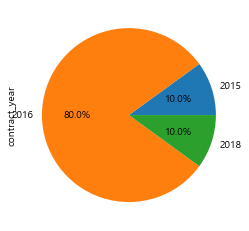

In [5]:
df_count = df_inter_top10.groupby(["contract_year"]).size()
df_count.plot.pie(ylabel='contract_year', autopct = "%.1f%%")

<AxesSubplot:ylabel='contract_year'>

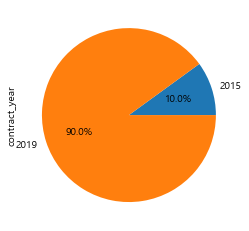

In [6]:
df_count = df_inter_low10.groupby(["contract_year"]).size()
df_count.plot.pie(ylabel='contract_year', autopct = "%.1f%%")

In [7]:
df_inter_top10tt = df_inter.head(20)
df_inter_low10tt = df_inter.tail(20)



print (df_inter_top10tt["contract_year"].value_counts())
print('\n--------------------------------------------------')
print (df_inter_low10tt["contract_year"].value_counts())

2016    11
2017     4
2015     3
2018     2
Name: contract_year, dtype: int64

--------------------------------------------------
2019    12
2015     8
Name: contract_year, dtype: int64


### 영화 관람 등급

In [8]:
print (df_inter_top10["mpa_rating"].value_counts())
print('\n--------------------------------------------------')
print (df_inter_low10["mpa_rating"].value_counts())

PG-13    4
PG       3
R        2
G        1
Name: mpa_rating, dtype: int64

--------------------------------------------------
PG-13    7
PG       2
R        1
Name: mpa_rating, dtype: int64


<AxesSubplot:ylabel='mpa_rating'>

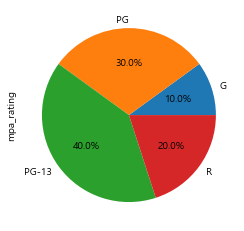

In [9]:
df_count = df_inter_top10.groupby(["mpa_rating"]).size()
df_count.plot.pie(ylabel='mpa_rating', autopct = "%.1f%%")

<AxesSubplot:ylabel='mpa_rating'>

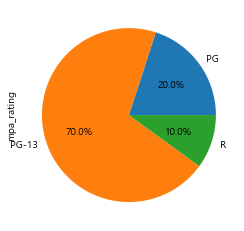

In [10]:
df_count = df_inter_low10.groupby(["mpa_rating"]).size()
df_count.plot.pie(ylabel='mpa_rating', autopct = "%.1f%%")

### 판권 계약 금액

In [11]:
top_mean_pan = df_inter_top10["contract_price"].mean()
print ('가장 잘 팔리는 영화 상위10개의 판권 구입금액 평균: ', top_mean_pan)

low_mean_pan = df_inter_low10["contract_price"].mean()
print ('가장 안 팔리는 영화 상위10개의 판권 구입금액 평균: ', low_mean_pan)

all_mean_pan = df_inter["contract_price"].mean()
print ('전체 영화 판권 구입금액 평균: ', all_mean_pan)

가장 잘 팔리는 영화 상위10개의 판권 구입금액 평균:  2407.0
가장 안 팔리는 영화 상위10개의 판권 구입금액 평균:  2533.5
전체 영화 판권 구입금액 평균:  2438.6792452830186


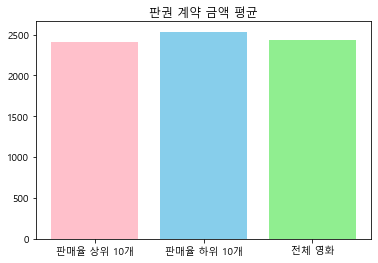

In [12]:
x = np.arange(3)
colors = ["pink","skyblue","lightgreen"]
years = ['판매율 상위 10개','판매율 하위 10개','전체 영화']
values = [top_mean_pan, low_mean_pan, all_mean_pan]

plt.title('판권 계약 금액 평균')
plt.bar(x, values,  color=colors)
plt.xticks(x, years)
plt.show()

<AxesSubplot:ylabel='contract_price'>

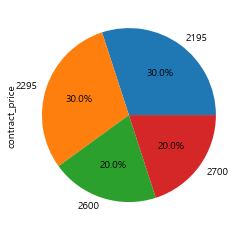

In [13]:
df_count = df_inter_top10.groupby(["contract_price"]).size()
df_count.plot.pie(ylabel='contract_price', autopct = "%.1f%%")

<AxesSubplot:ylabel='contract_price'>

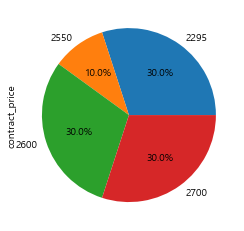

In [14]:
df_count = df_inter_low10.groupby(["contract_price"]).size()
df_count.plot.pie(ylabel='contract_price', autopct = "%.1f%%")

### 총 수익 금액 (좋은 영화)

In [15]:
top_mean_su = df_inter_top10["total_dollar"].mean()
print ('가장 잘 팔리는 영화 상위10개의 좋은영화 총 매출 평균: ', top_mean_su)

low_mean_su = df_inter_low10["total_dollar"].mean()
print ('가장 안 팔리는 영화 상위10개의 좋은영화 총 수입금액 평균: ', low_mean_su)

all_mean_su = df_inter["total_dollar"].mean()
print ('전체 영화 판권 좋은영화 총 수입금액 평균: ', all_mean_su)

가장 잘 팔리는 영화 상위10개의 좋은영화 총 매출 평균:  11603.9
가장 안 팔리는 영화 상위10개의 좋은영화 총 수입금액 평균:  24.8
전체 영화 판권 좋은영화 총 수입금액 평균:  4490.83962264151


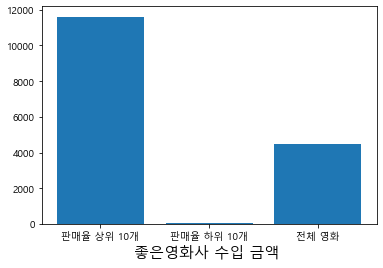

In [16]:
x = np.arange(3)
years = ['판매율 상위 10개','판매율 하위 10개','전체 영화']
values = [top_mean_su, low_mean_su, all_mean_su]

plt.xlabel('좋은영화사 수입 금액 ', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

In [17]:
# 수입 usa 금액 
top_mean_usa = df_inter_top10["income_usa"].mean()
print ('가장 잘 팔리는 영화 상위10개의 총 미국수입금액 평균: ', top_mean_usa)

low_mean_usa = df_inter_low10["income_usa"].mean()
print ('가장 안 팔리는 영화 상위10개의 총 미국수입금액 평균: ', low_mean_usa)

all_mean_usa = df_inter["income_usa"].mean()
print ('전체 영화 판권 좋은영화 총 미국수입금액 평균: ', all_mean_usa)

가장 잘 팔리는 영화 상위10개의 총 미국수입금액 평균:  228072367.2
가장 안 팔리는 영화 상위10개의 총 미국수입금액 평균:  341407077.3
전체 영화 판권 좋은영화 총 미국수입금액 평균:  299911908.8396226


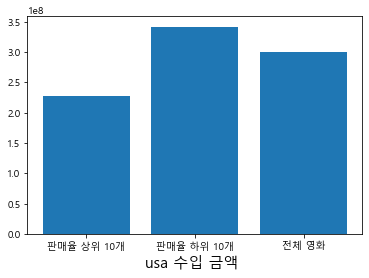

In [18]:
x = np.arange(3)
years = ['판매율 상위 10개','판매율 하위 10개','전체 영화']
values = [top_mean_usa, low_mean_usa, all_mean_usa]

plt.xlabel('usa 수입 금액 ', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

### 제작 예산

In [19]:
# 제작예산 평균 
top_mean_budget = df_inter_top10["budget"].mean()
print ('가장 잘 팔리는 영화 상위10개의 제작 예산 평균: ', top_mean_budget)

low_mean_budget = df_inter_low10["budget"].mean()
print ('가장 안 팔리는 영화 하위10개의 제작 예산 평균: ', low_mean_budget)

all_mean_budget = df_inter["budget"].mean()
print ('전체 영화 제작 예산 평균: ', all_mean_budget)

가장 잘 팔리는 영화 상위10개의 제작 예산 평균:  147500000.0
가장 안 팔리는 영화 하위10개의 제작 예산 평균:  150500000.0
전체 영화 제작 예산 평균:  148474528.3018868


### votes

In [20]:
# votes 평균 
top_mean_votes = df_inter_top10["votes"].mean()
print ('가장 잘 팔리는 영화 상위10개의 vote수 평균: ', top_mean_votes)

low_mean_votes = df_inter_low10["votes"].mean()
print ('가장 안 팔리는 영화 하위 10개의 vote수 평균: ', low_mean_votes)

all_mean_votes = df_inter["votes"].mean()
print ('전체 영화 vote수 평균: ', all_mean_votes)

가장 잘 팔리는 영화 상위10개의 vote수 평균:  358205.9
가장 안 팔리는 영화 하위 10개의 vote수 평균:  361459.7
전체 영화 vote수 평균:  467400.24528301886


###  reviews_users // reviews_critics

In [21]:
# reviews_users 평균 = 관심 정도
top_mean_re_ur = df_inter_top10["reviews_users"].mean()
print ('가장 잘 팔리는 영화 상위10개의 reviews_users 평균: ', top_mean_re_ur)

low_mean_re_ur = df_inter_low10["reviews_users"].mean()
print ('가장 안 팔리는 영화 하위 10개의 reviews_users 평균: ', low_mean_re_ur)

all_mean_re_ur = df_inter["reviews_users"].mean()
print ('전체 영화 reviews_users 평균: ', all_mean_re_ur)

가장 잘 팔리는 영화 상위10개의 reviews_users 평균:  753.6
가장 안 팔리는 영화 하위 10개의 reviews_users 평균:  1985.3
전체 영화 reviews_users 평균:  1304.132075471698


<AxesSubplot:>

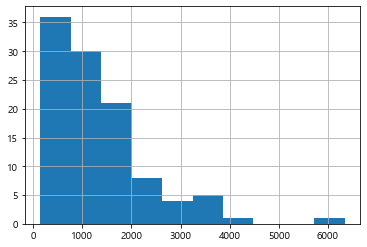

In [22]:
df_inter["reviews_users"].hist()

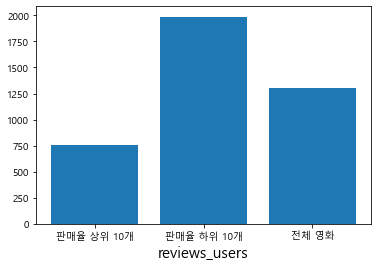

In [23]:
x = np.arange(3)
years = ['판매율 상위 10개','판매율 하위 10개','전체 영화']
values = [top_mean_re_ur, low_mean_re_ur, all_mean_re_ur]

plt.xlabel('reviews_users', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

In [24]:
# reviews_critics 평균 
top_mean_re_cr = df_inter_top10["reviews_critics"].mean()
print ('가장 잘 팔리는 영화 상위10개의 reviews_critics 평균: ', top_mean_re_cr)

low_mean_re_cr = df_inter_low10["reviews_critics"].mean()
print ('가장 안 팔리는 영화 하위 10개의 reviews_critics 평균: ', low_mean_re_cr)

all_mean_re_cr = df_inter["reviews_critics"].mean()
print ('전체 영화 reviews_critics 평균: ', all_mean_re_cr)

가장 잘 팔리는 영화 상위10개의 reviews_critics 평균:  452.8
가장 안 팔리는 영화 하위 10개의 reviews_critics 평균:  457.7
전체 영화 reviews_critics 평균:  468.1792452830189


### 평점

In [25]:
# imdb_score 평균 
top_mean_score = df_inter_top10["imdb_score"].mean()
print ('가장 잘 팔리는 영화 상위10개의 imdb_score 평균: ', round(top_mean_score, 3))

low_mean_score = df_inter_low10["imdb_score"].mean()
print ('가장 안 팔리는 영화 하위 10개의 imdb_score 평균: ', round(low_mean_score, 3))

all_mean_score = df_inter["imdb_score"].mean()
print ('전체 영화 imdb_score 평균: ', round(all_mean_score, 2))
all_mean_score

가장 잘 팔리는 영화 상위10개의 imdb_score 평균:  7.48
가장 안 팔리는 영화 하위 10개의 imdb_score 평균:  7.59
전체 영화 imdb_score 평균:  7.2


7.199999999999999

<AxesSubplot:>

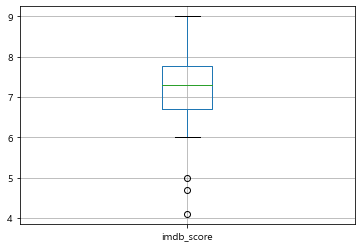

In [26]:
df_inter[["imdb_score"]].boxplot()

<AxesSubplot:>

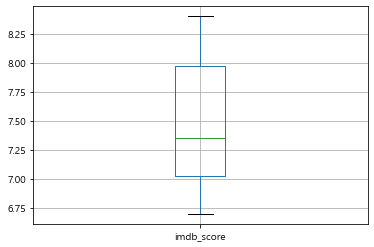

In [27]:
df_inter_top10[["imdb_score"]].boxplot()

<AxesSubplot:>

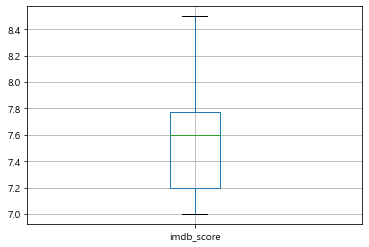

In [28]:
df_inter_low10[["imdb_score"]].boxplot()

### runtime

In [29]:
# runtime 평균 
top_mean_runtime = df_inter_top10["runtime"].mean()
print ('가장 잘 팔리는 영화 상위10개의 runtime 평균: ', top_mean_runtime)

low_mean_runtime = df_inter_low10["runtime"].mean()
print ('가장 안 팔리는 영화 하위 10개의 runtime 평균: ', low_mean_runtime)

all_mean_runtime = df_inter["runtime"].mean()
print ('전체 영화 runtime 평균: ', all_mean_runtime)

가장 잘 팔리는 영화 상위10개의 runtime 평균:  122.0
가장 안 팔리는 영화 하위 10개의 runtime 평균:  127.6
전체 영화 runtime 평균:  125.23584905660377


### 영화관 추가

In [30]:
df_theater = pd.read_csv('./movie_inventory.csv', encoding = 'cp949')
df_theater = df_theater[['item_id', 'theater_total']]

In [31]:
mg = pd.merge( df_inter, df_theater , on="item_id")

In [32]:
mg

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest,theater_total
0,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,188,...,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0,3902
1,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,1231,...,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0,3854
2,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,376,...,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0,3142
3,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,1101,...,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0,3929
4,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,148,...,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0,3768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,I-1098,tt5463162,Deadpool 2,2018,2019,119,R,7.7,424573,1260,...,Josh Brolin,Morena Baccarin,2600,6,10,4500.0,0.0,0.0,-2600.0,4349
102,I-1104,tt1727824,Bohemian Rhapsody,2018,2019,134,PG-13,8.0,392599,3239,...,Lucy Boynton,Gwilym Lee,2600,6,10,4500.0,0.0,0.0,-2600.0,4000
103,I-1097,tt4154756,Avengers: Infinity War,2018,2019,149,PG-13,8.5,725138,4111,...,Chris Hemsworth,Mark Ruffalo,2700,10,10,7200.0,0.0,0.0,-2700.0,4474
104,I-1100,tt3606756,Incredibles 2,2018,2019,118,PG,7.7,219133,1033,...,Holly Hunter,Sarah Vowell,2700,10,10,7200.0,0.0,0.0,-2700.0,4410


In [33]:
mg_top10 = mg.head(10)
display(mg_top10)
mg_top10.info()

mg_low10 = mg.tail(10)
display(mg_low10)
mg_low10.info()

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest,theater_total
0,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,188,...,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0,3902
1,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,1231,...,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0,3854
2,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,376,...,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0,3142
3,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,1101,...,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0,3929
4,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,148,...,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0,3768
5,I-1093,tt2380307,Coco,2017,2018,105,PG,8.4,305662,930,...,Gael Garc占쏙옙a Bernal,Benjamin Bratt,2700,10,10,7200.0,12657600.0,11142.0,8442.0,3987
6,I-1048,tt2395427,Avengers: Age of Ultron,2015,2016,141,PG-13,7.3,688963,1242,...,Chris Hemsworth,Mark Ruffalo,2295,10,1,5500.0,11137500.0,9804.0,7509.0,4276
7,I-1044,tt2310332,The Hobbit: The Battle of the Five Armies,2014,2015,144,PG-13,7.4,447259,869,...,Martin Freeman,Richard Armitage,2195,6,1,4500.0,9729000.0,8564.0,6369.0,3875
8,I-1054,tt2096673,Inside Out,2015,2016,95,PG,8.2,556161,972,...,Phyllis Smith,Richard Kind,2700,10,10,7200.0,9957600.0,8765.0,6065.0,4158
9,I-1052,tt3079380,Spy,2015,2016,119,R,7.0,217805,479,...,Raad Rawi,Melissa McCarthy,2195,6,1,4500.0,8950500.0,7879.0,5684.0,3715


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          10 non-null     object 
 1   movie_id         10 non-null     object 
 2   title            10 non-null     object 
 3   release_year     10 non-null     int64  
 4   contract_year    10 non-null     int64  
 5   runtime          10 non-null     int64  
 6   mpa_rating       10 non-null     object 
 7   imdb_score       10 non-null     float64
 8   votes            10 non-null     int64  
 9   reviews_users    10 non-null     int64  
 10  reviews_critics  10 non-null     int64  
 11  budget           10 non-null     int64  
 12  income_usa       10 non-null     int64  
 13  income_ww        10 non-null     int64  
 14  country_1        10 non-null     object 
 15  studio           10 non-null     object 
 16  director         10 non-null     object 
 17  Genre_1          10

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest,theater_total
96,I-1102,tt5095030,Ant-Man and the Wasp,2018,2019,118,PG-13,7.1,266808,906,...,Evangeline Lilly,Michael Pe占쏙옙a,2295,10,1,7200.0,0.0,0.0,-2295.0,4206
97,I-1105,tt5848272,Ralph Breaks the Internet,2018,2019,112,PG,7.1,105555,723,...,Sarah Silverman,Gal Gadot,2295,10,1,7200.0,0.0,0.0,-2295.0,4017
98,I-1106,tt1477834,Aquaman,2018,2019,143,PG-13,7.0,311374,3713,...,Amber Heard,Willem Dafoe,2295,10,1,4500.0,0.0,0.0,-2295.0,4184
99,I-1038,tt1951264,The Hunger Games: Catching Fire,2013,2015,146,PG-13,7.5,584383,698,...,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0,282000.0,248.0,-2352.0,4163
100,I-1096,tt6644200,A Quiet Place,2018,2019,90,PG-13,7.5,333041,2617,...,John Krasinski,Millicent Simmonds,2550,4,10,5000.0,0.0,0.0,-2550.0,3808
101,I-1098,tt5463162,Deadpool 2,2018,2019,119,R,7.7,424573,1260,...,Josh Brolin,Morena Baccarin,2600,6,10,4500.0,0.0,0.0,-2600.0,4349
102,I-1104,tt1727824,Bohemian Rhapsody,2018,2019,134,PG-13,8.0,392599,3239,...,Lucy Boynton,Gwilym Lee,2600,6,10,4500.0,0.0,0.0,-2600.0,4000
103,I-1097,tt4154756,Avengers: Infinity War,2018,2019,149,PG-13,8.5,725138,4111,...,Chris Hemsworth,Mark Ruffalo,2700,10,10,7200.0,0.0,0.0,-2700.0,4474
104,I-1100,tt3606756,Incredibles 2,2018,2019,118,PG,7.7,219133,1033,...,Holly Hunter,Sarah Vowell,2700,10,10,7200.0,0.0,0.0,-2700.0,4410
105,I-1103,tt4912910,Mission: Impossible - Fallout,2018,2019,147,PG-13,7.8,251993,1553,...,Henry Cavill,Ving Rhames,2700,10,10,5000.0,0.0,0.0,-2700.0,4395


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 96 to 105
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          10 non-null     object 
 1   movie_id         10 non-null     object 
 2   title            10 non-null     object 
 3   release_year     10 non-null     int64  
 4   contract_year    10 non-null     int64  
 5   runtime          10 non-null     int64  
 6   mpa_rating       10 non-null     object 
 7   imdb_score       10 non-null     float64
 8   votes            10 non-null     int64  
 9   reviews_users    10 non-null     int64  
 10  reviews_critics  10 non-null     int64  
 11  budget           10 non-null     int64  
 12  income_usa       10 non-null     int64  
 13  income_ww        10 non-null     int64  
 14  country_1        10 non-null     object 
 15  studio           10 non-null     object 
 16  director         10 non-null     object 
 17  Genre_1         

In [34]:
# 영화관수 평균
top_mean_theater = mg_top10["theater_total"].mean()
print ('가장 잘 팔리는 영화 상위10개 오픈 영화관 수 평균: ', top_mean_theater)

low_mean_theater = mg_low10["theater_total"].mean()
print ('가장 안 팔리는 영화 하위 10개의 오픈 영화관 수 평균: ', low_mean_theater)

all_mean_theater = mg["theater_total"].mean()
print ('전체 영화 오픈 영화관 수 평균: ', all_mean_theater)

가장 잘 팔리는 영화 상위10개 오픈 영화관 수 평균:  3860.6
가장 안 팔리는 영화 하위 10개의 오픈 영화관 수 평균:  4200.6
전체 영화 오픈 영화관 수 평균:  4010.5943396226417


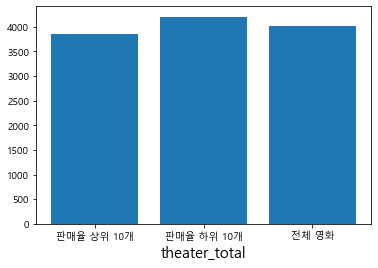

In [35]:
x = np.arange(3)
years = ['판매율 상위 10개','판매율 하위 10개','전체 영화']
values = [top_mean_theater, low_mean_theater, all_mean_theater]

plt.xlabel('theater_total', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

## 총 정리

** 분석해본거 
    
- 개봉일 (20개씩으로 늘려서 확인 필요)      
	top10: 2016년 9개 / 2018년 1개 / 2015년 1개      
	low10: 2019 9개 / 2015년 1개      
    
--> 20개씩 늘렸을때 --> 2019년꺼가 인기가 없음,, 늦게 개봉해서?      
	top10: 2016년 11개 / 2017년 4개 / 2018년 2개 / 2015년 3개      
	low10: 2019 12개 / 2015년 8개      

연도별 판권 계약금액 평균 
1. 2015 2,466.4
2. 2016 2,350.6
3. 2017 2,476.8
4. 2018 2,468.3
5. 2019 2,466.0
--> 판권 계약금액이 비싸다 = 크게 흥행했다 -> 자사에서는 인기가 없다로 연결 가능     
                   

                  
             
- 영화 관람 등급 --> 관련없어 보임      
	top10: PG-13 4개 / PG 3개 / R 2개 / G 1개      
	low10: PG-13 7개 / PG 2개 / R 1개       
            
            
            
- 판권계약 금액 평균 // 인기 있는 영화가 계약금액이 낮음      
	top10: 2,407 달러       
	low10: 2,533.5 달러       
	all  : 2,438.6 달러       
      
      
- 좋은영화 총 수익 금액 // 총수익 금액은 top이 low대비 467배 // 평균 수익 대비       top10 영화는 2.58배 수      
	top10: 11,603.9 달러       
	low10: 24.8 달러       
	all  : 4,490.8 달러       
      
      
- USA 총 수익 금액 // 미국 수익은 top이 low의 60%정도임       
	top10: 228,072,367.2 달러      
	low10: 341,407,077.3 달러      
	all  : 299,911,908.8 달러      
      
      
- 판권 금액 대비 usa 수입 (미국 수입 평균 / 판권 구매 금액 평균)  // top이 low에 비해 70% 정도 수입      
	top10: 94,753.78 달러       
	low10: 134,757.08 달러      
	all  : 122,981.28 달러      
      
      
- 판권 금액 대비 좋은영화 수입 (좋은영화 수입 평균 / 판권 구매 금액 평균)       
	--> top이 low 대비 500배 이상      
	top10: 4.820 달러      
	low10: 0.009 달러      
	all  : 1.841 달러      
      
      
- 제작 예산 금액 - 관련 없음      
	top10: 147,500,000 달러      
	low10: 150,500,000 달러      
	all  : 148,474,528 달러      
      
      
- votes 개수 - 연관 없음      
	top10: 358,205개      
	low10: 361,459개      
	all  : 467,400개      
      
      
- reviews_users 개수 // top이 low대비 37% 리뷰수 (인기없는)      
	top10: 753.6개      
	low10: 1,985.3개      
	all  : 1,304.1개      
      
      
- reviews_critics 개수 - 관계 없는      
	top10: 452.8      
	low10: 457.7      
	all  : 468.1      
      
      
- 평점 평균 -- 관계 없음       
	top10: 7.47      
	low10: 7.59      
	all  : 7.19      
      
      
- runtime 평균 -- 관계 없음       
	top10: 122.0      
	low10: 127.6      
	all  : 125.2      
      
      
인기 척도 : 박스오피스의 기준을 사용 
- 박스오피스 흥행 척도 = 관객수(theater total, reviews users) , 매출액 (income_usa 사용)
평점(영화 평가), 리뷰스 (관심 정도,,)

미국에서 인기 있는데 우리 영화사에서는 인기없다 
1. 판권 계약 금액
2. 미국에서 매출
3. 리뷰스
4. 


가설: 평점이 높거나 흥행을 한 영화는 매출이 높을것이다 

평점 --> 크게 영향이 없지만 높은데도 인기없음 // 수익 창출이 안됨 
데이터 분포 확인
- 리뷰스 (관심정도)
	-> 관심이 많은게 우리 고객이 구매하지 않았다
	-> 
- 흥행도 (미국 매출 // 판권 계약금액이 미국 매출 기준이여서)
	-> 미국에서 흥행한 영화를 우리고객이 구매하지 않았다 

- 판권 계약 금액
	-> 비싼애들이 잘 팔려야 되는데 우리고객이 구매하지 않음 

## 요약 

자사에서 인기 있는 영화가 
- 판권계약 금액이 낮음(평균대비)
- USA 총 매출이 낮음 (평균대비)
   --> low는 미국에서 인기있어서 샀는데 수입이 안난듯 
- review를 적은 user수가 low에 비해 37%정도 밖에 없음 - usa수입과 연관지어 생각
- 전문가 (critics) 리뷰수는 평균, low와 비슷함 (전문가는 어느정도 평점 되는 영화를 다 봐서?)
- 평점, runtime은 평균, low와 별 차이 없음 

## 현재 보유 영화가 진짜 인기있는 영화일까? 확인

- 자사 매출 상위 10번째 영화 지표 
    - theater_total = 4,380
    - reviews_users = 2,878
    - income_usa = 110,825,712
    
- imdb meta data income_usa, reviews_users순으로 정렬 후 상위 10개 영화를 보유하는지 확인 

title     
0. 	Avengers: Endgame
1. 	Avatar*
2. 	Black Panther*
3. 	Avengers: Infinity War*
4. 	Jurassic World*
5. 	Incredibles 2*
6. 	The Dark Knight*
7. 	Finding Dory*
8. 	Avengers: Age of Ultron*
9. 	The Dark Knight Rises*

title
1.	Captain Marvel
4.	Aquaman*
5.	Interstellar
6.	Batman v Superman: Dawn of Justice*
7.	Venom
8.	Inception*
9. 	Star Wars: Episode III - Revenge of the Sith*

--> 중복제거후 봤을때 imdb 인기영화 17개중 13개 보유 --> 인기있는 영화 판권을 주로 계약했음을 알수있음 

--> EDA 결과를 고려하여 상영당시 너무 흥행한 영화가 아닌 상대적으로 덜 흥행한 영화를 계약해야 함

--> 현재 보유 영화 106개의 평균 판권계약 금액 = 2440달러        
-EDA 결과를 고려하여 상대적으로 덜 흥행한 영화 계약      
    - 판권 계약 시 상대적으로 덜 흥행한 영화를 계약하여 평균 계약금액을 2440달러에서 2250달러로 200달러정도 절감하고 각 영화에서 더 많은 수익을 기대해볼 수있다.    
    
   ------------------------------------------
- 시뮬레이션 할 영화들
1. Mr.Been's Holiday - 계약금: 2,195달러 예상매출액: 6,190
2. Evan almighty - 계약금: 2,295 예상매출액:5,750달러
3. Glass - 계약금: 2,195달러 예상매출액 : 5,310달러

## 상위 12개 영화를 확인해보면 어떤지 ?

In [36]:
df_inter_top12 = df_inter.head(12)
display(df_inter_top12)
df_inter_top12.info()

df_inter_low12 = df_inter.tail(12)
display(df_inter_low12)
df_inter_low12.info()

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest
0,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,188,...,Trombone Shorty,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0
1,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,1231,...,Matt Damon,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0
2,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,376,...,O'Shea Jackson Jr.,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0
3,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,1101,...,Daniel Craig,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0
4,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,148,...,Adam Sandler,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0
5,I-1093,tt2380307,Coco,2017,2018,105,PG,8.4,305662,930,...,Anthony Gonzalez,Gael Garc占쏙옙a Bernal,Benjamin Bratt,2700,10,10,7200.0,12657600.0,11142.0,8442.0
6,I-1048,tt2395427,Avengers: Age of Ultron,2015,2016,141,PG-13,7.3,688963,1242,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,2295,10,1,5500.0,11137500.0,9804.0,7509.0
7,I-1044,tt2310332,The Hobbit: The Battle of the Five Armies,2014,2015,144,PG-13,7.4,447259,869,...,Ian McKellen,Martin Freeman,Richard Armitage,2195,6,1,4500.0,9729000.0,8564.0,6369.0
8,I-1054,tt2096673,Inside Out,2015,2016,95,PG,8.2,556161,972,...,Amy Poehler,Phyllis Smith,Richard Kind,2700,10,10,7200.0,9957600.0,8765.0,6065.0
9,I-1052,tt3079380,Spy,2015,2016,119,R,7.0,217805,479,...,Jude Law,Raad Rawi,Melissa McCarthy,2195,6,1,4500.0,8950500.0,7879.0,5684.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          12 non-null     object 
 1   movie_id         12 non-null     object 
 2   title            12 non-null     object 
 3   release_year     12 non-null     int64  
 4   contract_year    12 non-null     int64  
 5   runtime          12 non-null     int64  
 6   mpa_rating       12 non-null     object 
 7   imdb_score       12 non-null     float64
 8   votes            12 non-null     int64  
 9   reviews_users    12 non-null     int64  
 10  reviews_critics  12 non-null     int64  
 11  budget           12 non-null     int64  
 12  income_usa       12 non-null     int64  
 13  income_ww        12 non-null     int64  
 14  country_1        12 non-null     object 
 15  studio           12 non-null     object 
 16  director         12 non-null     object 
 17  Genre_1          1

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest
94,I-1099,tt3778644,Solo: A Star Wars Story,2018,2019,135,PG-13,7.0,242506,2342,...,Alden Ehrenreich,Joonas Suotamo,Woody Harrelson,2295,10,1,7200.0,0.0,0.0,-2295.0
95,I-1101,tt4881806,Jurassic World: Fallen Kingdom,2018,2019,128,PG-13,6.2,233261,1738,...,Chris Pratt,Bryce Dallas Howard,Rafe Spall,2295,10,1,4500.0,0.0,0.0,-2295.0
96,I-1102,tt5095030,Ant-Man and the Wasp,2018,2019,118,PG-13,7.1,266808,906,...,Paul Rudd,Evangeline Lilly,Michael Pe占쏙옙a,2295,10,1,7200.0,0.0,0.0,-2295.0
97,I-1105,tt5848272,Ralph Breaks the Internet,2018,2019,112,PG,7.1,105555,723,...,John C. Reilly,Sarah Silverman,Gal Gadot,2295,10,1,7200.0,0.0,0.0,-2295.0
98,I-1106,tt1477834,Aquaman,2018,2019,143,PG-13,7.0,311374,3713,...,Jason Momoa,Amber Heard,Willem Dafoe,2295,10,1,4500.0,0.0,0.0,-2295.0
99,I-1038,tt1951264,The Hunger Games: Catching Fire,2013,2015,146,PG-13,7.5,584383,698,...,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0,282000.0,248.0,-2352.0
100,I-1096,tt6644200,A Quiet Place,2018,2019,90,PG-13,7.5,333041,2617,...,Emily Blunt,John Krasinski,Millicent Simmonds,2550,4,10,5000.0,0.0,0.0,-2550.0
101,I-1098,tt5463162,Deadpool 2,2018,2019,119,R,7.7,424573,1260,...,Ryan Reynolds,Josh Brolin,Morena Baccarin,2600,6,10,4500.0,0.0,0.0,-2600.0
102,I-1104,tt1727824,Bohemian Rhapsody,2018,2019,134,PG-13,8.0,392599,3239,...,Rami Malek,Lucy Boynton,Gwilym Lee,2600,6,10,4500.0,0.0,0.0,-2600.0
103,I-1097,tt4154756,Avengers: Infinity War,2018,2019,149,PG-13,8.5,725138,4111,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,2700,10,10,7200.0,0.0,0.0,-2700.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 94 to 105
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          12 non-null     object 
 1   movie_id         12 non-null     object 
 2   title            12 non-null     object 
 3   release_year     12 non-null     int64  
 4   contract_year    12 non-null     int64  
 5   runtime          12 non-null     int64  
 6   mpa_rating       12 non-null     object 
 7   imdb_score       12 non-null     float64
 8   votes            12 non-null     int64  
 9   reviews_users    12 non-null     int64  
 10  reviews_critics  12 non-null     int64  
 11  budget           12 non-null     int64  
 12  income_usa       12 non-null     int64  
 13  income_ww        12 non-null     int64  
 14  country_1        12 non-null     object 
 15  studio           12 non-null     object 
 16  director         12 non-null     object 
 17  Genre_1         

### 개봉일 
- 상위 10개 -> 2016 > 2018 = 2015
- 하위 10개 -> 2019 >>> 2015

In [37]:
print (df_inter_top12["contract_year"].value_counts())
print('\n--------------------------------------------------')
print (df_inter_low12["contract_year"].value_counts())

2016    8
2017    2
2015    1
2018    1
Name: contract_year, dtype: int64

--------------------------------------------------
2019    11
2015     1
Name: contract_year, dtype: int64


<AxesSubplot:ylabel='contract_year'>

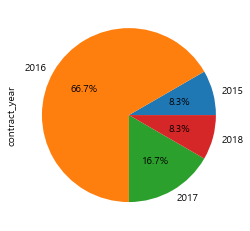

In [38]:
df_count = df_inter_top12.groupby(["contract_year"]).size()
df_count.plot.pie(ylabel='contract_year', autopct = "%.1f%%")

<AxesSubplot:ylabel='contract_year'>

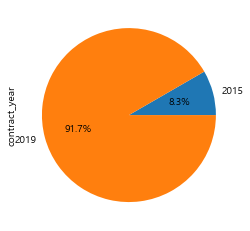

In [39]:
df_count = df_inter_low12.groupby(["contract_year"]).size()
df_count.plot.pie(ylabel='contract_year', autopct = "%.1f%%")

In [40]:
df_inter_top12tt = df_inter.head(20)
df_inter_low12tt = df_inter.tail(20)



print (df_inter_top10tt["contract_year"].value_counts())
print('\n--------------------------------------------------')
print (df_inter_low10tt["contract_year"].value_counts())

2016    11
2017     4
2015     3
2018     2
Name: contract_year, dtype: int64

--------------------------------------------------
2019    12
2015     8
Name: contract_year, dtype: int64


In [41]:
## 매출과 관련 없음 

### 영화 관람 등급

In [42]:
print (df_inter_top12["mpa_rating"].value_counts())
print('\n--------------------------------------------------')
print (df_inter_low12["mpa_rating"].value_counts())

PG-13    5
PG       4
R        2
G        1
Name: mpa_rating, dtype: int64

--------------------------------------------------
PG-13    9
PG       2
R        1
Name: mpa_rating, dtype: int64


<AxesSubplot:ylabel='mpa_rating'>

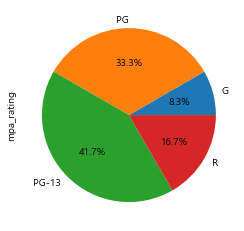

In [43]:
df_count = df_inter_top12.groupby(["mpa_rating"]).size()
df_count.plot.pie(ylabel='mpa_rating', autopct = "%.1f%%")

<AxesSubplot:ylabel='mpa_rating'>

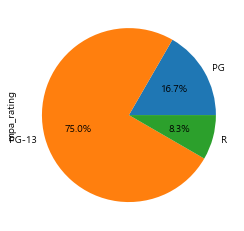

In [44]:
df_count = df_inter_low12.groupby(["mpa_rating"]).size()
df_count.plot.pie(ylabel='mpa_rating', autopct = "%.1f%%")

### 판권 계약 금액

In [45]:
top_mean_pan = df_inter_top12["contract_price"].mean()
print ('가장 잘 팔리는 영화 상위12개의 판권 구입금액 평균: ', top_mean_pan)

low_mean_pan = df_inter_low12["contract_price"].mean()
print ('가장 안 팔리는 영화 상위12개의 판권 구입금액 평균: ', low_mean_pan)

all_mean_pan = df_inter["contract_price"].mean()
print ('전체 영화 판권 구입금액 평균: ', all_mean_pan)

가장 잘 팔리는 영화 상위12개의 판권 구입금액 평균:  2455.8333333333335
가장 안 팔리는 영화 상위12개의 판권 구입금액 평균:  2493.75
전체 영화 판권 구입금액 평균:  2438.6792452830186


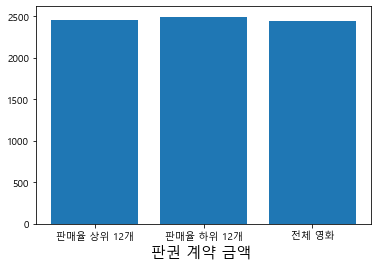

In [46]:
x = np.arange(3)
years = ['판매율 상위 12개','판매율 하위 12개','전체 영화']
values = [top_mean_pan, low_mean_pan, all_mean_pan]

plt.xlabel('판권 계약 금액 ', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

<AxesSubplot:ylabel='contract_price'>

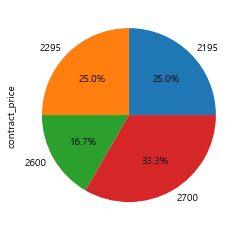

In [47]:
df_count = df_inter_top12.groupby(["contract_price"]).size()
df_count.plot.pie(ylabel='contract_price', autopct = "%.1f%%")

<AxesSubplot:ylabel='contract_price'>

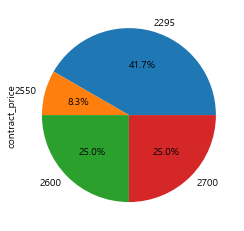

In [48]:
df_count = df_inter_low12.groupby(["contract_price"]).size()
df_count.plot.pie(ylabel='contract_price', autopct = "%.1f%%")

### 총 수익 금액 (좋은 영화)

In [49]:
top_mean_su = df_inter_top12["total_dollar"].mean()
print ('가장 잘 팔리는 영화 상위12개의 좋은영화 총 매출 평균: ', round(top_mean_su,2))

low_mean_su = df_inter_low12["total_dollar"].mean()
print ('가장 안 팔리는 영화 상위12개의 좋은영화 총 수입금액 평균: ', round(low_mean_su,2))

all_mean_su = df_inter["total_dollar"].mean()
print ('전체 영화 판권 좋은영화 총 수입금액 평균: ', round(all_mean_su,2))

가장 잘 팔리는 영화 상위12개의 좋은영화 총 매출 평균:  11039.33
가장 안 팔리는 영화 상위12개의 좋은영화 총 수입금액 평균:  20.67
전체 영화 판권 좋은영화 총 수입금액 평균:  4490.84


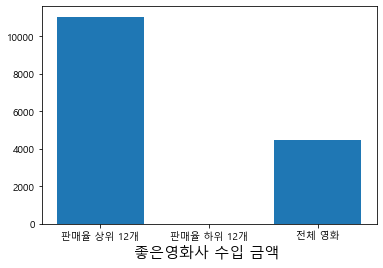

In [50]:
x = np.arange(3)
years = ['판매율 상위 12개','판매율 하위 12개','전체 영화']
values = [top_mean_su, low_mean_su, all_mean_su]

plt.xlabel('좋은영화사 수입 금액 ', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

### 총 수익 금액 (좋은 영화)

In [51]:
top_mean_su = df_inter_top12["total_dollar"].mean()
print ('가장 잘 팔리는 영화 상위12개의 좋은영화 총 매출 평균: ', round(top_mean_su,2))

low_mean_su = df_inter_low12["total_dollar"].mean()
print ('가장 안 팔리는 영화 상위12개의 좋은영화 총 수입금액 평균: ', round(low_mean_su,2))

all_mean_su = df_inter["total_dollar"].mean()
print ('전체 영화 판권 좋은영화 총 수입금액 평균: ', round(all_mean_su,2))

가장 잘 팔리는 영화 상위12개의 좋은영화 총 매출 평균:  11039.33
가장 안 팔리는 영화 상위12개의 좋은영화 총 수입금액 평균:  20.67
전체 영화 판권 좋은영화 총 수입금액 평균:  4490.84


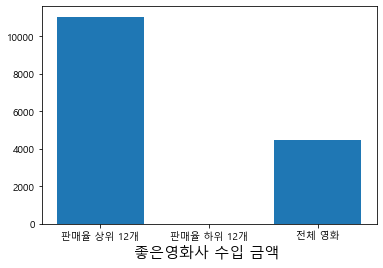

In [52]:
x = np.arange(3)
years = ['판매율 상위 12개','판매율 하위 12개','전체 영화']
values = [top_mean_su, low_mean_su, all_mean_su]

plt.xlabel('좋은영화사 수입 금액 ', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

In [53]:
# 수입 usa 금액 
top_mean_usa = df_inter_top12["income_usa"].mean()
print ('가장 잘 팔리는 영화 상위12개의 총 미국수입금액 평균: ', round (top_mean_usa,2))

low_mean_usa = df_inter_low12["income_usa"].mean()
print ('가장 안 팔리는 영화 상위12개의 총 미국수입금액 평균: ', round (low_mean_usa,2))

all_mean_usa = df_inter["income_usa"].mean()
print ('전체 영화 판권 좋은영화 총 미국수입금액 평균: ',round (all_mean_usa,2))

가장 잘 팔리는 영화 상위12개의 총 미국수입금액 평균:  237886153.33
가장 안 팔리는 영화 상위12개의 총 미국수입금액 평균:  337129837.08
전체 영화 판권 좋은영화 총 미국수입금액 평균:  299911908.84


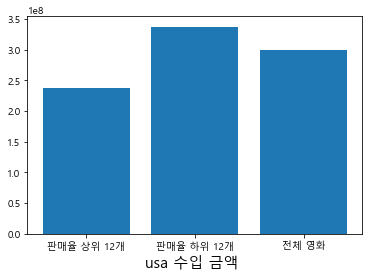

In [54]:
x = np.arange(3)
years = ['판매율 상위 12개','판매율 하위 12개','전체 영화']
values = [top_mean_usa, low_mean_usa, all_mean_usa]

plt.xlabel('usa 수입 금액 ', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

### 제작 예산

In [55]:
# 제작예산 평균 
top_mean_budget = df_inter_top12["budget"].mean()
print ('가장 잘 팔리는 영화 상위12개의 제작 예산 평균: ', round(top_mean_budget,2))

low_mean_budget = df_inter_low12["budget"].mean()
print ('가장 안 팔리는 영화 하위12개의 제작 예산 평균: ', round(low_mean_budget,2))

all_mean_budget = df_inter["budget"].mean()
print ('전체 영화 제작 예산 평균: ', round(all_mean_budget,2))

가장 잘 팔리는 영화 상위12개의 제작 예산 평균:  149166666.67
가장 안 팔리는 영화 하위12개의 제작 예산 평균:  162500000.0
전체 영화 제작 예산 평균:  148474528.3


### votes

In [56]:
# votes 평균 
top_mean_votes = df_inter_top12["votes"].mean()
print ('가장 잘 팔리는 영화 상위12개의 vote수 평균: ', top_mean_votes)

low_mean_votes = df_inter_low12["votes"].mean()
print ('가장 안 팔리는 영화 하위 12개의 vote수 평균: ', low_mean_votes)

all_mean_votes = df_inter["votes"].mean()
print ('전체 영화 vote수 평균: ', all_mean_votes)

가장 잘 팔리는 영화 상위12개의 vote수 평균:  376639.1666666667
가장 안 팔리는 영화 하위 12개의 vote수 평균:  340863.6666666667
전체 영화 vote수 평균:  467400.24528301886


###  reviews_users // reviews_critics

In [57]:
# reviews_users 평균 = 관심 정도
top_mean_re_ur = df_inter_top12["reviews_users"].mean()
print ('가장 잘 팔리는 영화 상위12개의 reviews_users 평균: ', round(top_mean_re_ur,2))

low_mean_re_ur = df_inter_low12["reviews_users"].mean()
print ('가장 안 팔리는 영화 하위 12개의 reviews_users 평균: ', round(low_mean_re_ur,2))

all_mean_re_ur = df_inter["reviews_users"].mean()
print ('전체 영화 reviews_users 평균: ', round(all_mean_re_ur,2))

가장 잘 팔리는 영화 상위12개의 reviews_users 평균:  754.83
가장 안 팔리는 영화 하위 12개의 reviews_users 평균:  1994.42
전체 영화 reviews_users 평균:  1304.13


<AxesSubplot:>

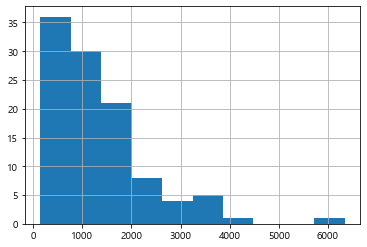

In [58]:
df_inter["reviews_users"].hist()

###  reviews_users // reviews_critics

In [59]:
# reviews_users 평균 = 관심 정도
top_mean_re_ur = df_inter_top12["reviews_users"].mean()
print ('가장 잘 팔리는 영화 상위12개의 reviews_users 평균: ', round(top_mean_re_ur,2))

low_mean_re_ur = df_inter_low12["reviews_users"].mean()
print ('가장 안 팔리는 영화 하위 12개의 reviews_users 평균: ', round(low_mean_re_ur,2))

all_mean_re_ur = df_inter["reviews_users"].mean()
print ('전체 영화 reviews_users 평균: ', round(all_mean_re_ur,2))

가장 잘 팔리는 영화 상위12개의 reviews_users 평균:  754.83
가장 안 팔리는 영화 하위 12개의 reviews_users 평균:  1994.42
전체 영화 reviews_users 평균:  1304.13


<AxesSubplot:>

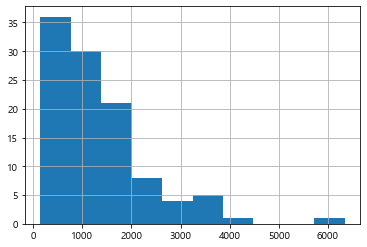

In [60]:
df_inter["reviews_users"].hist()

가장 잘 팔리는 영화 상위12개의 reviews_users 평균:  754.83
가장 안 팔리는 영화 하위 12개의 reviews_users 평균:  1994.42
전체 영화 reviews_users 평균:  1304.13


<AxesSubplot:>

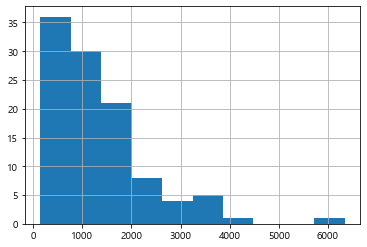

In [61]:
###  reviews_users // reviews_critics

# reviews_users 평균 = 관심 정도
top_mean_re_ur = df_inter_top12["reviews_users"].mean()
print ('가장 잘 팔리는 영화 상위12개의 reviews_users 평균: ', round(top_mean_re_ur,2))

low_mean_re_ur = df_inter_low12["reviews_users"].mean()
print ('가장 안 팔리는 영화 하위 12개의 reviews_users 평균: ', round(low_mean_re_ur,2))

all_mean_re_ur = df_inter["reviews_users"].mean()
print ('전체 영화 reviews_users 평균: ', round(all_mean_re_ur,2))

df_inter["reviews_users"].hist()

In [62]:
# reviews_critics 평균 
top_mean_re_cr = df_inter_top12["reviews_critics"].mean()
print ('가장 잘 팔리는 영화 상위12개의 reviews_critics 평균: ', top_mean_re_cr)

low_mean_re_cr = df_inter_low12["reviews_critics"].mean()
print ('가장 안 팔리는 영화 하위 12개의 reviews_critics 평균: ', low_mean_re_cr)

all_mean_re_cr = df_inter["reviews_critics"].mean()
print ('전체 영화 reviews_critics 평균: ', all_mean_re_cr)

가장 잘 팔리는 영화 상위12개의 reviews_critics 평균:  464.4166666666667
가장 안 팔리는 영화 하위 12개의 reviews_critics 평균:  464.6666666666667
전체 영화 reviews_critics 평균:  468.1792452830189


### 평점

In [63]:
# imdb_score 평균 
top_mean_score = df_inter_top12["imdb_score"].mean()
print ('가장 잘 팔리는 영화 상위12개의 imdb_score 평균: ', round(top_mean_score, 3))

low_mean_score = df_inter_low12["imdb_score"].mean()
print ('가장 안 팔리는 영화 하위 12개의 imdb_score 평균: ', round(low_mean_score, 3))

all_mean_score = df_inter["imdb_score"].mean()
print ('전체 영화 imdb_score 평균: ', round(all_mean_score, 2))
all_mean_score

가장 잘 팔리는 영화 상위12개의 imdb_score 평균:  7.525
가장 안 팔리는 영화 하위 12개의 imdb_score 평균:  7.425
전체 영화 imdb_score 평균:  7.2


7.199999999999999

<AxesSubplot:>

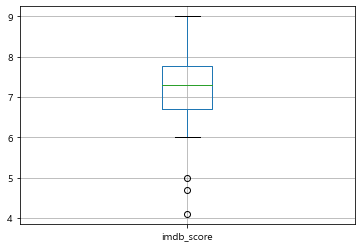

In [64]:
df_inter[["imdb_score"]].boxplot()

<AxesSubplot:>

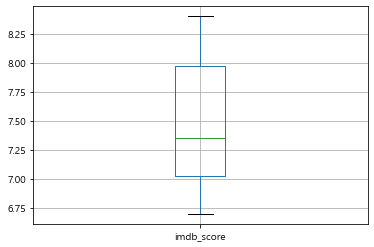

In [65]:
df_inter_top10[["imdb_score"]].boxplot()

<AxesSubplot:>

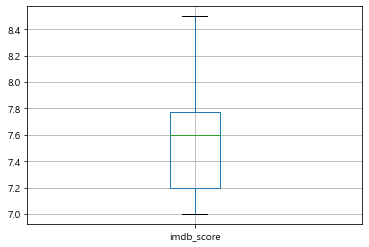

In [66]:
df_inter_low10[["imdb_score"]].boxplot()

### runtime

In [67]:
# runtime 평균 
top_mean_runtime = df_inter_top12["runtime"].mean()
print ('가장 잘 팔리는 영화 상위12개의 runtime 평균: ', top_mean_runtime)

low_mean_runtime = df_inter_low12["runtime"].mean()
print ('가장 안 팔리는 영화 하위 12개의 runtime 평균: ', low_mean_runtime)

all_mean_runtime = df_inter["runtime"].mean()
print ('전체 영화 runtime 평균: ', all_mean_runtime)

가장 잘 팔리는 영화 상위12개의 runtime 평균:  120.25
가장 안 팔리는 영화 하위 12개의 runtime 평균:  128.25
전체 영화 runtime 평균:  125.23584905660377


### 영화관 추가

In [68]:
df_theater = pd.read_csv('./movie_inventory.csv', encoding = 'cp949')
df_theater = df_theater[['item_id', 'theater_total']]

In [69]:
mg = pd.merge( df_inter, df_theater , on="item_id")

In [70]:
mg

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest,theater_total
0,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,188,...,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0,3902
1,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,1231,...,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0,3854
2,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,376,...,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0,3142
3,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,1101,...,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0,3929
4,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,148,...,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0,3768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,I-1098,tt5463162,Deadpool 2,2018,2019,119,R,7.7,424573,1260,...,Josh Brolin,Morena Baccarin,2600,6,10,4500.0,0.0,0.0,-2600.0,4349
102,I-1104,tt1727824,Bohemian Rhapsody,2018,2019,134,PG-13,8.0,392599,3239,...,Lucy Boynton,Gwilym Lee,2600,6,10,4500.0,0.0,0.0,-2600.0,4000
103,I-1097,tt4154756,Avengers: Infinity War,2018,2019,149,PG-13,8.5,725138,4111,...,Chris Hemsworth,Mark Ruffalo,2700,10,10,7200.0,0.0,0.0,-2700.0,4474
104,I-1100,tt3606756,Incredibles 2,2018,2019,118,PG,7.7,219133,1033,...,Holly Hunter,Sarah Vowell,2700,10,10,7200.0,0.0,0.0,-2700.0,4410


In [71]:
mg_top12 = mg.head(12)
display(mg_top12)
mg_top12.info()

mg_low12 = mg.tail(12)
display(mg_low12)
mg_low12.info()

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest,theater_total
0,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,188,...,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0,3902
1,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,1231,...,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0,3854
2,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,376,...,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0,3142
3,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,1101,...,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0,3929
4,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,148,...,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0,3768
5,I-1093,tt2380307,Coco,2017,2018,105,PG,8.4,305662,930,...,Gael Garc占쏙옙a Bernal,Benjamin Bratt,2700,10,10,7200.0,12657600.0,11142.0,8442.0,3987
6,I-1048,tt2395427,Avengers: Age of Ultron,2015,2016,141,PG-13,7.3,688963,1242,...,Chris Hemsworth,Mark Ruffalo,2295,10,1,5500.0,11137500.0,9804.0,7509.0,4276
7,I-1044,tt2310332,The Hobbit: The Battle of the Five Armies,2014,2015,144,PG-13,7.4,447259,869,...,Martin Freeman,Richard Armitage,2195,6,1,4500.0,9729000.0,8564.0,6369.0,3875
8,I-1054,tt2096673,Inside Out,2015,2016,95,PG,8.2,556161,972,...,Phyllis Smith,Richard Kind,2700,10,10,7200.0,9957600.0,8765.0,6065.0,4158
9,I-1052,tt3079380,Spy,2015,2016,119,R,7.0,217805,479,...,Raad Rawi,Melissa McCarthy,2195,6,1,4500.0,8950500.0,7879.0,5684.0,3715


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          12 non-null     object 
 1   movie_id         12 non-null     object 
 2   title            12 non-null     object 
 3   release_year     12 non-null     int64  
 4   contract_year    12 non-null     int64  
 5   runtime          12 non-null     int64  
 6   mpa_rating       12 non-null     object 
 7   imdb_score       12 non-null     float64
 8   votes            12 non-null     int64  
 9   reviews_users    12 non-null     int64  
 10  reviews_critics  12 non-null     int64  
 11  budget           12 non-null     int64  
 12  income_usa       12 non-null     int64  
 13  income_ww        12 non-null     int64  
 14  country_1        12 non-null     object 
 15  studio           12 non-null     object 
 16  director         12 non-null     object 
 17  Genre_1          1

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest,theater_total
94,I-1099,tt3778644,Solo: A Star Wars Story,2018,2019,135,PG-13,7.0,242506,2342,...,Joonas Suotamo,Woody Harrelson,2295,10,1,7200.0,0.0,0.0,-2295.0,4381
95,I-1101,tt4881806,Jurassic World: Fallen Kingdom,2018,2019,128,PG-13,6.2,233261,1738,...,Bryce Dallas Howard,Rafe Spall,2295,10,1,4500.0,0.0,0.0,-2295.0,4485
96,I-1102,tt5095030,Ant-Man and the Wasp,2018,2019,118,PG-13,7.1,266808,906,...,Evangeline Lilly,Michael Pe占쏙옙a,2295,10,1,7200.0,0.0,0.0,-2295.0,4206
97,I-1105,tt5848272,Ralph Breaks the Internet,2018,2019,112,PG,7.1,105555,723,...,Sarah Silverman,Gal Gadot,2295,10,1,7200.0,0.0,0.0,-2295.0,4017
98,I-1106,tt1477834,Aquaman,2018,2019,143,PG-13,7.0,311374,3713,...,Amber Heard,Willem Dafoe,2295,10,1,4500.0,0.0,0.0,-2295.0,4184
99,I-1038,tt1951264,The Hunger Games: Catching Fire,2013,2015,146,PG-13,7.5,584383,698,...,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0,282000.0,248.0,-2352.0,4163
100,I-1096,tt6644200,A Quiet Place,2018,2019,90,PG-13,7.5,333041,2617,...,John Krasinski,Millicent Simmonds,2550,4,10,5000.0,0.0,0.0,-2550.0,3808
101,I-1098,tt5463162,Deadpool 2,2018,2019,119,R,7.7,424573,1260,...,Josh Brolin,Morena Baccarin,2600,6,10,4500.0,0.0,0.0,-2600.0,4349
102,I-1104,tt1727824,Bohemian Rhapsody,2018,2019,134,PG-13,8.0,392599,3239,...,Lucy Boynton,Gwilym Lee,2600,6,10,4500.0,0.0,0.0,-2600.0,4000
103,I-1097,tt4154756,Avengers: Infinity War,2018,2019,149,PG-13,8.5,725138,4111,...,Chris Hemsworth,Mark Ruffalo,2700,10,10,7200.0,0.0,0.0,-2700.0,4474


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 94 to 105
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          12 non-null     object 
 1   movie_id         12 non-null     object 
 2   title            12 non-null     object 
 3   release_year     12 non-null     int64  
 4   contract_year    12 non-null     int64  
 5   runtime          12 non-null     int64  
 6   mpa_rating       12 non-null     object 
 7   imdb_score       12 non-null     float64
 8   votes            12 non-null     int64  
 9   reviews_users    12 non-null     int64  
 10  reviews_critics  12 non-null     int64  
 11  budget           12 non-null     int64  
 12  income_usa       12 non-null     int64  
 13  income_ww        12 non-null     int64  
 14  country_1        12 non-null     object 
 15  studio           12 non-null     object 
 16  director         12 non-null     object 
 17  Genre_1         

In [72]:
# 영화관수 평균
top_mean_theater = mg_top12["theater_total"].mean()
print ('가장 잘 팔리는 영화 상위12개 오픈 영화관 수 평균: ', top_mean_theater)

low_mean_theater = mg_low12["theater_total"].mean()
print ('가장 안 팔리는 영화 하위 12개의 오픈 영화관 수 평균: ', low_mean_theater)

all_mean_theater = mg["theater_total"].mean()
print ('전체 영화 오픈 영화관 수 평균: ', all_mean_theater)

가장 잘 팔리는 영화 상위12개 오픈 영화관 수 평균:  3870.5833333333335
가장 안 팔리는 영화 하위 12개의 오픈 영화관 수 평균:  4239.333333333333
전체 영화 오픈 영화관 수 평균:  4010.5943396226417


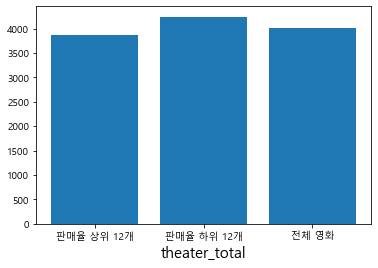

In [73]:
x = np.arange(3)
years = ['판매율 상위 12개','판매율 하위 12개','전체 영화']
values = [top_mean_theater, low_mean_theater, all_mean_theater]

plt.xlabel('theater_total', fontsize=15)
plt.bar(x, values)
plt.xticks(x, years)
plt.show()